In [2]:
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [16]:
column_names = ["repository_timestamp",
                "op",
                "dms_timestamp",
                "id",
                "shift_id",
                "start_date_time",
                "end_date_time",
                "realized_start_date_time",
                "realized_end_date_time",
                "comm_to_employee_date_time",
                "comm_to_customer_date_time",
                "is_realiz_ok_by_customer",
                "decl_to_erp_system_date_time",
                "decl_to_erp_system_tag",
                "accept_by_employee_date_time",
                "accept_by_customer_date_time",
                "qual_fast_filter_id",
                "current_qual_percentage",
                "qual_percentage_increment",
                "realized_export_date_time",
                "planned_export_date_time",
                "last_change_date_of_planning",
                "pool_id",
                "customer_in_pool_id",
                "creation_date_time",
                "creation_with_type_id",
                "last_change_with_type_id",
                "deleted_date_time",
                "deleted_with_type_id",
                "comm_to_employee_with_type_id",
                "accept_by_emp_with_type_id",
                "comm_to_customer_with_type_id",
                "planned_export_with_type_id",
                "realized_date_time",
                "realized_with_type_id",
                "accept_by_cust_with_type_id",
                "decl_to_erp_with_type_id",
                "realized_export_with_type_id",
                "employee_id",
                "pool_employee_id",
                "is_first_time_by_customer",
                "event_id",
                "declared_start_date_time",
                "declared_end_date_time",
                "declared_event_id",
                "is_pauses_realized",
                "is_cost_categories_realized",
                "realized_event_id",
                "is_administrative_checked",
                "clocked_start_date_time",
                "clocked_end_date_time",
                "is_realization_doubtful",
                "is_to_evaluate_for_clock",
                "realized_by_employee_date_time",
                "confirmed_date_time",
                "confirmed_with_type_id",
                "viewable_for_emp_date_time",
                "viewable_for_emp_with_type_id",
                "called_up_date_time",
                "called_up_with_type_id",
                "reject_by_emp_date_time",
                "reject_by_emp_with_type_id",
                "reason_edit_emp_shift_type_id",
                "reason_edit_emp_shift_text",
                "changed_planned_hours_dt",
                "changed_event_date_time",
                "reason_deviant_realiz_type_id",
                "deviant_realization_start_dt",
                "deviant_realization_end_dt",
                "reason_deviant_realiz_text",
                "un_reject_by_planner_date_time",
                "current_call_up_id",
                "deviant_realization_event_id",
                "subst_group_id",
                "subst_date_time",
                "subst_with_type_id",
                "subst_prev_emp_in_shift_id",
                "subst_next_emp_in_shift_id",
                "is_on_call_employee",
                "placement_number",
                "is_on_call_source_type_id",
                "decl_examined_date_time",
                "batchid",
                "batch_ts"]

In [7]:
cols_of_interest=["repository_timestamp",
                "op",
                "dms_timestamp",
                "id",
                "shift_id",
                "start_date_time",
                "end_date_time",
                "realized_start_date_time",
                "realized_end_date_time",
                "employee_id",
                "pool_employee_id",
                 "pool_id",
                 "confirmed_date_time", # level of interest doubtfull
                 "called_up_date_time",
                 "decl_to_erp_system_date_time",
                 "accept_by_employee_date_time",
                 "viewable_for_emp_date_time",
                 "deleted_date_time"]

In [18]:
data_folder = '../data/'
file = 'repo_iplan_employee_in_shift_20200210-20200216.csv'
df=pd.read_csv(data_folder + file,names=column_names,usecols=cols_of_interest,parse_dates=
               ["repository_timestamp",
                "dms_timestamp",
                "start_date_time",
                "end_date_time",
                "realized_start_date_time",
                "realized_end_date_time",
                "decl_to_erp_system_date_time",
                "accept_by_employee_date_time",
                "viewable_for_emp_date_time",
                "deleted_date_time",
                "called_up_date_time"])

In [27]:
df['start_date'] = df['start_date_time'].dt.date
df['end_date']= df['end_date_time'].dt.date
df['start_time'] = df['start_date_time'].dt.strftime('%H:%M')
df['end_time'] = df['end_date_time'].dt.strftime('%H:%M')

In [28]:
df = df[df['end_date_time'] < '2022-02-21 00:00:01']

print(df.shape)

print(f"{df.repository_timestamp.min()} - {df.repository_timestamp.max()}")
# what is the meaning of repository_timestamp? these dates suggest that shift data is modified long before shifts start, and after they finish

print(f"{df.start_date.min()} - {df.start_date.max()}")

print(f"{df.start_date.min().strftime('%A')} - {df.start_date.max().strftime('%A')}")

(248119, 22)
2020-08-18 20:22:52.059095 - 2020-09-10 12:19:48.679259
2020-02-09 - 2020-02-16
Sunday - Sunday


In [29]:
df.shift_id = df.shift_id.astype('category')
df.pool_id = df.pool_id.astype('category')
df.employee_id = df.employee_id.astype('category')
df.pool_employee_id = df.pool_employee_id.astype('category')

In [30]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
confirmed_date_time,confirmed_date_time,99.123808
realized_end_date_time,realized_end_date_time,75.373510
realized_start_date_time,realized_start_date_time,75.326759
decl_to_erp_system_date_time,decl_to_erp_system_date_time,72.220185
deleted_date_time,deleted_date_time,67.696146
viewable_for_emp_date_time,viewable_for_emp_date_time,58.816133
accept_by_employee_date_time,accept_by_employee_date_time,51.256857
called_up_date_time,called_up_date_time,31.988280
repository_timestamp,repository_timestamp,0.000000
pool_employee_id,pool_employee_id,0.000000


### What does a typical iPlan week look like?

- number of shifts
- number of employee
- number of pools
    - employees per pool
- average shifts per pool
- average employees per pool
- average employees per shift

In [51]:
print('Statistics for one week of sample data')
print(f'number of shifts: {df.shift_id.nunique()}')
print(f'number of employees: {df.employee_id.nunique()}')
print(f'number of pools: {df.pool_id.nunique()}')

Statistics for one week of sample data
number of shifts: 69118
number of employees: 43562
number of pools: 442


In [31]:
print('Statistics for one week of sample data')
print(f'number of shifts: {df.shift_id.nunique()}')
print(f'number of employees: {df.employee_id.nunique()}')
print(f'number of pools: {df.pool_id.nunique()}')

Statistics for one week of sample data
number of shifts: 72017
number of employees: 39967
number of pools: 472


In [ ]:
#### Pools

In [ ]:
dist plot number of employees
dist plot number of shifts

In [33]:
pooldf = df[['pool_id','shift_id','employee_id']].groupby(['pool_id']).agg({ 'shift_id' : 'nunique', 'employee_id' : 'nunique'})
pooldf.columns = ['num_shifts','num_employees']

In [34]:
print(f"min: {pooldf['num_shifts'].min()}, max: {pooldf['num_shifts'].max()}, mean: {pooldf['num_shifts'].mean()}")
print(f"min: {pooldf['num_employees'].min()}, max: {pooldf['num_employees'].max()}, mean: {pooldf['num_employees'].mean()}")

min: 2, max: 2972, mean: 152.57838983050848
min: 1, max: 1361, mean: 86.29872881355932


In [98]:
print(f"min: {pooldf['num_shifts'].min()}, max: {pooldf['num_shifts'].max()}, mean: {pooldf['num_shifts'].mean()}")
print(f"min: {pooldf['num_employees'].min()}, max: {pooldf['num_employees'].max()}, mean: {pooldf['num_employees'].mean()}")

min: 1, max: 2825, mean: 156.37556561085972
min: 1, max: 2134, mean: 99.4841628959276


In [36]:
pooldf[pooldf['num_employees'] == 1]

,num_shifts,num_employees
pool_id,,
727,5,1
7170,3,1
10262,5,1
14283,5,1
15744,4,1
20083,5,1
20943,5,1


In [109]:
pooldf[pooldf['num_employees'] == 1]

,num_shifts,num_employees
pool_id,,
2024.0,3,1
14863.0,3,1
15364.0,1,1
20903.0,2,1
23246.0,5,1
23686.0,1,1


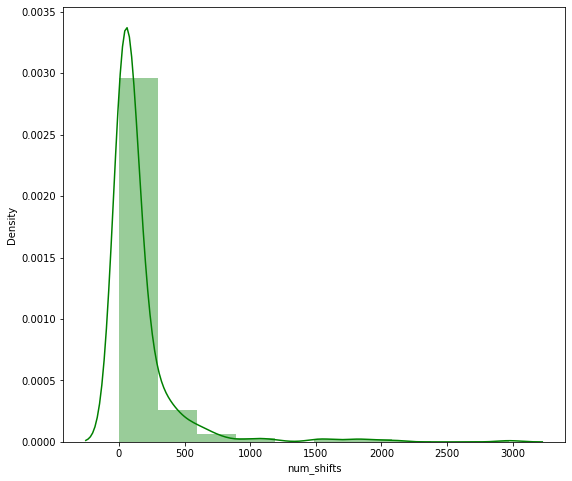

In [37]:
plt.figure(figsize=(9, 8))
sns.distplot(pooldf['num_shifts'], color='g', bins=10, hist_kws={'alpha': 0.4});

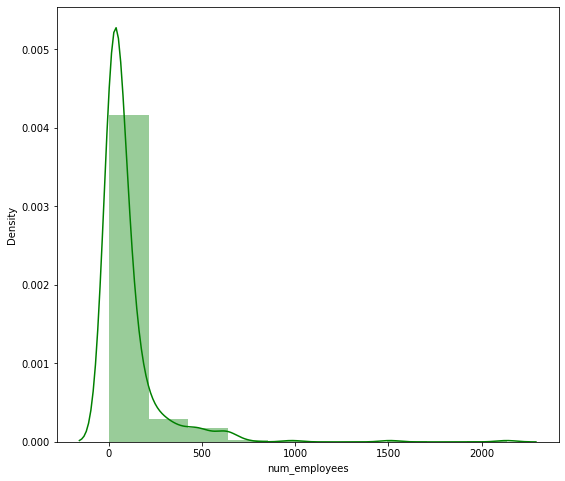

In [106]:
plt.figure(figsize=(9, 8))
sns.distplot(pooldf['num_employees'], color='g', bins=10);

In [114]:
len(pooldf[pooldf['num_shifts']<10])

34

In [115]:
pooldf.shape

(442, 2)

In [ ]:
#### Shifts

In [ ]:
dist plot number of employees
per day?

In [ ]:
#### Employees

In [ ]:
dist plot number of shifts
are any in more than one pool?

In [50]:
df.head()

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time,shift_day_of_week,start_date,end_date,start_time,end_time
0,2021-11-03 11:30:42.201719,I,2021-11-03 10:12:26.546180,138070862.0,143894755.0,2022-02-15 12:30:00.000000,2022-02-15 17:30:00.000000,NaN,NaN,NaN,NaN,4368.0,2021-06-17 15:36:22.000000,71502.0,1208611.0,NaN,2021-01-25 01:25:09.000000,NaN,Tuesday,2022-02-15,2022-02-15,12:30,17:30
1,2021-11-03 11:30:42.201719,I,2021-11-03 10:16:13.698780,139056869.0,144798670.0,2022-02-16 06:30:00.000000,2022-02-16 14:30:00.000000,NaN,NaN,NaN,NaN,11262.0,2021-10-04 11:23:19.000000,833614.0,1149713.0,NaN,2021-02-22 01:49:40.000000,NaN,Wednesday,2022-02-16,2022-02-16,06:30,14:30
2,2021-11-03 11:30:42.201719,I,2021-11-03 10:16:45.888114,139056900.0,144798639.0,2022-02-20 06:30:00.000000,2022-02-20 14:30:00.000000,NaN,NaN,NaN,NaN,11262.0,2021-10-29 09:43:42.000000,494823.0,706469.0,NaN,2021-02-22 01:49:43.000000,NaN,Sunday,2022-02-20,2022-02-20,06:30,14:30
3,2021-11-03 11:30:42.201719,I,2021-11-03 10:16:45.900642,139057142.0,144798698.0,2022-02-16 06:30:00.000000,2022-02-16 14:30:00.000000,NaN,NaN,NaN,NaN,11262.0,2021-08-02 09:07:30.000000,796882.0,1102126.0,NaN,2021-02-22 01:49:57.000000,NaN,Wednesday,2022-02-16,2022-02-16,06:30,14:30
4,2021-11-03 11:30:42.201719,I,2021-11-03 10:16:13.710262,139057188.0,144798162.0,2022-02-19 22:30:00.000000,2022-02-20 06:30:00.000000,NaN,NaN,NaN,NaN,11262.0,NaN,494758.0,706404.0,NaN,2021-02-22 01:49:59.000000,NaN,Saturday,2022-02-19,2022-02-20,22:30,06:30
